In [1]:
!pip install sklearn

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.4/30.4 MB 995.8 kB/s eta 0:00:00 eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.0/307.0 kB 1.5 MB/s eta 0:00:00 MB/s eta 0:00:01:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=6e902007012b5c204407280547f78981920c533db2b7f86897f29d00be3eea1b
  Stored in directory: /home/alphine/.cache/pip/wheels/9b/13/01/6f3a7fd641f90e1f6c8c7cded057f3394f451f340371c68f3d
Successfully built sklearn


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from seaborn import heatmap
plt.style.use('ggplot')
%matplotlib inline

## Load the Iris dataset

In [2]:
iris = load_iris()
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Normalize the dataset

In [3]:
x_centered = X - X.mean(axis=0)
x_scaled = x_centered / x_centered.std(axis = 0)
print("Column-wise mean", x_scaled.mean(axis=0))
print("Column-wise variance", x_scaled.var(axis=0))

Column-wise mean [-1.65238193e-15 -1.86239912e-15 -1.68901929e-15 -1.44254978e-15]
Column-wise variance [1. 1. 1. 1.]


## Find the Covariance matrix

In [4]:
np.cov?

In [5]:
# Transposing because cov takes rows 
C = np.cov(x_scaled.T)
C

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [6]:
cdf = pd.DataFrame(C, index = iris.feature_names, columns=iris.feature_names)
cdf

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.006711,-0.118359,0.877604,0.823431
sepal width (cm),-0.118359,1.006711,-0.431316,-0.368583
petal length (cm),0.877604,-0.431316,1.006711,0.969328
petal width (cm),0.823431,-0.368583,0.969328,1.006711


<AxesSubplot:>

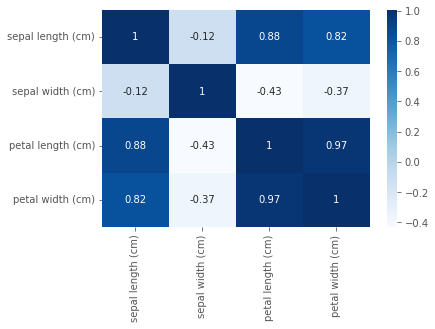

In [7]:
heatmap(cdf, annot=True, cmap = plt.cm.Blues)

## Get the Eigenvalues & eigenvectors of the covariace matrix

In [8]:
w, v = np.linalg.eig(C)
w

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [9]:
ix = np.argsort(w)[::-1]
v_sorted = v[:,ix]

## Select the number of components to keep

In [10]:
N = 2

## Project the data onto the principal components

In [11]:
v_inv = np.linalg.pinv(v_sorted)

In [12]:
x_lr = np.dot(v_inv, x_scaled.T).T
x_lr_reduced = x_lr[:,:N]

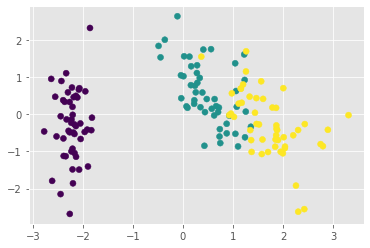

In [13]:
plt.scatter(x_lr_reduced[:,0],x_lr_reduced[:,1],c=y)

# Automate PCA with sklearn

In [14]:
pca = PCA()
x_lr = pca.fit_transform(X)

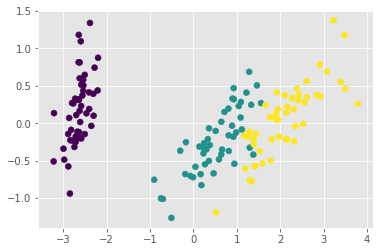

In [15]:
plt.scatter(x_lr[:, 0], x_lr[:, 1], c=y)

## Variance of each component - Scree Plots

Text(0, 0.5, 'Ratio of Variance')

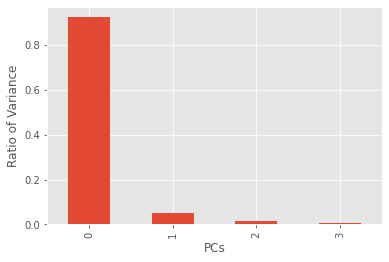

In [16]:
pd.Series(pca.explained_variance_ratio_).plot(kind='bar')
plt.xlabel('PCs')
plt.ylabel('Ratio of Variance')

Text(0, 0.5, 'Cumulative Variance Ratio')

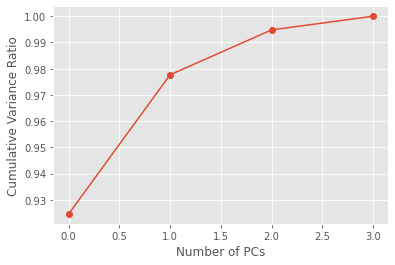

In [17]:
plt.plot(np.cumsum(pca.explained_variance_ratio_), '-o')
plt.xlabel('Number of PCs')
plt.ylabel('Cumulative Variance Ratio')

## Biplot

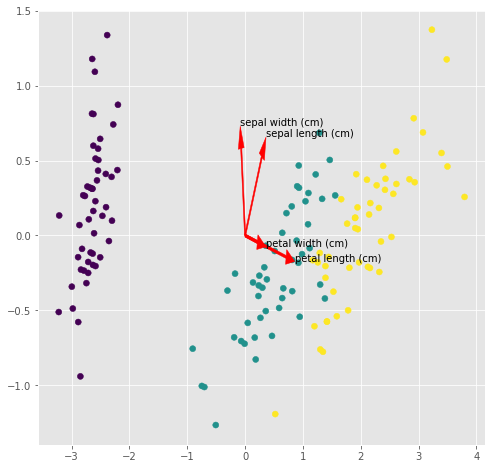

In [18]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(x_lr[:, 0], x_lr[:, 1], c=y)
components = pca.components_
sv = pca.singular_values_
for i, feat in enumerate(iris.feature_names):
    xx, yy = components[:2, i] # * sv[i]
    ax.arrow(0, 0, xx, yy, color='r', width=0.02 ,length_includes_head=True, head_width=0.1)
    ax.text(xx, yy, feat)

# Exercise: Try PCA on the Breast Cancer dataset (given below):
## 1. Find the number of PCs required to get > 99% variance
## 2. Plot the top 2 PCs

In [19]:
from sklearn.datasets import load_breast_cancer
bc = load_breast_cancer()
X = bc.data
y = bc.target
df = pd.DataFrame(X, columns=bc.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [20]:
# enter code here
pca = PCA()
x_lr = pca.fit_transform(df)

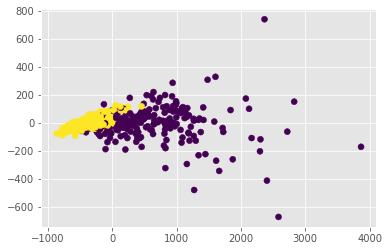

In [21]:
plt.scatter(x_lr[:, 0], x_lr[:, 1], c=y)

Text(0, 0.5, 'Ratio of Variance')

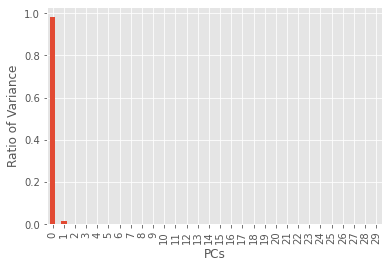

In [22]:
pd.Series(pca.explained_variance_ratio_).plot(kind='bar')
plt.xlabel('PCs')
plt.ylabel('Ratio of Variance')

Text(0, 0.5, 'Cumulative Variance Ratio')

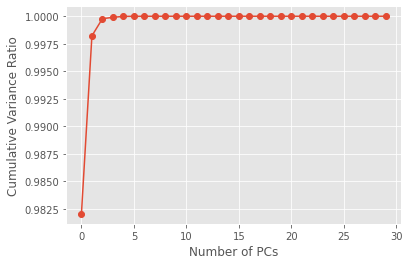

In [23]:
plt.plot(np.cumsum(pca.explained_variance_ratio_), '-o')
plt.xlabel('Number of PCs')
plt.ylabel('Cumulative Variance Ratio')

In [24]:
np.cumsum(pca.explained_variance_ratio_)

array([0.98204467, 0.99822116, 0.99977867, 0.9998996 , 0.99998788,
       0.99999453, 0.99999854, 0.99999936, 0.99999971, 0.99999989,
       0.99999996, 0.99999998, 0.99999999, 0.99999999, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

#### Housing Dataset

In [27]:
x = pd.read_csv("newhousing.csv")

In [28]:
x

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
0,5250000,5500,3,2,1,1,0,1,0,0,0,0,1,0,1833.333333,0.666667
1,4480000,4040,3,1,2,1,0,0,0,0,1,0,1,0,1346.666667,0.333333
2,3570000,3640,2,1,1,1,0,0,0,0,0,0,0,1,1820.000000,0.500000
3,2870000,3040,2,1,1,0,0,0,0,0,0,0,0,1,1520.000000,0.500000
4,3570000,4500,2,1,1,0,0,0,0,0,0,0,0,0,2250.000000,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,4403000,4880,3,1,1,1,0,0,0,0,2,1,0,1,1626.666667,0.333333
541,2660000,2000,2,1,2,1,0,0,0,0,0,0,1,0,1000.000000,0.500000
542,4480000,8250,3,1,1,1,0,0,0,0,0,0,0,0,2750.000000,0.333333
543,5110000,11410,2,1,2,1,0,0,0,0,0,1,0,0,5705.000000,0.500000


In [29]:
x_centered = x - x.mean(axis=0)
x_scaled = x_centered / x_centered.std(axis = 0)
print("Column-wise mean", x_scaled.mean(axis=0))
print("Column-wise variance", x_scaled.var(axis=0))

Column-wise mean price              1.890435e-16
area              -1.417826e-16
bedrooms          -1.955622e-16
bathrooms         -5.866867e-17
stories           -1.042999e-16
mainroad          -9.126237e-17
guestroom         -4.889056e-18
basement          -1.499310e-16
hotwaterheating   -1.303748e-17
airconditioning   -3.911244e-17
parking            8.148426e-19
prefarea           5.866867e-17
semi-furnished    -5.866867e-17
unfurnished       -6.192804e-17
areaperbedroom     1.205967e-16
bbratio           -5.866867e-17
dtype: float64
Column-wise variance price              1.0
area               1.0
bedrooms           1.0
bathrooms          1.0
stories            1.0
mainroad           1.0
guestroom          1.0
basement           1.0
hotwaterheating    1.0
airconditioning    1.0
parking            1.0
prefarea           1.0
semi-furnished     1.0
unfurnished        1.0
areaperbedroom     1.0
bbratio            1.0
dtype: float64


In [30]:
# Transposing because cov takes rows 
C = np.cov(x_scaled.T)
C

array([[ 1.        ,  0.53599735,  0.36649403,  0.51754534,  0.42071237,
         0.29689849,  0.25551729,  0.1870566 ,  0.09307284,  0.45295408,
         0.38439365,  0.32977705,  0.06365634, -0.28058736,  0.24480947,
         0.2317317 ],
       [ 0.53599735,  1.        ,  0.15185849,  0.19381953,  0.08399605,
         0.28887411,  0.14029659,  0.04741699, -0.00922924,  0.2223931 ,
         0.35298048,  0.2347788 ,  0.00615616, -0.14227821,  0.80561042,
         0.0571156 ],
       [ 0.36649403,  0.15185849,  1.        ,  0.37393024,  0.40856424,
        -0.01203324,  0.0805487 ,  0.09731242,  0.04604889,  0.16060326,
         0.1392699 ,  0.07902306,  0.05003995, -0.12625202, -0.39725852,
        -0.31730317],
       [ 0.51754534,  0.19381953,  0.37393024,  1.        ,  0.32616471,
         0.04239762,  0.12646884,  0.10210571,  0.0671591 ,  0.18691503,
         0.17749582,  0.06347174,  0.02983353, -0.13210748, -0.0523518 ,
         0.72715441],
       [ 0.42071237,  0.08399605,  0

In [33]:
cdf = pd.DataFrame(C, index = x.columns, columns=x.columns)
cdf

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,0.063656,-0.280587,0.244809,0.231732
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,0.006156,-0.142278,0.805610,0.057116
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,0.050040,-0.126252,-0.397259,-0.317303
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,0.029834,-0.132107,-0.052352,0.727154
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,-0.003648,-0.082972,-0.178942,0.032962
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,0.011450,-0.133123,0.249829,0.030407
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,0.005821,-0.099023,0.054312,0.075854
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,0.050284,-0.117935,-0.017034,0.047346
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,0.063819,-0.059194,-0.021634,0.021520
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,-0.053179,-0.094086,0.096830,0.064649


<AxesSubplot:>

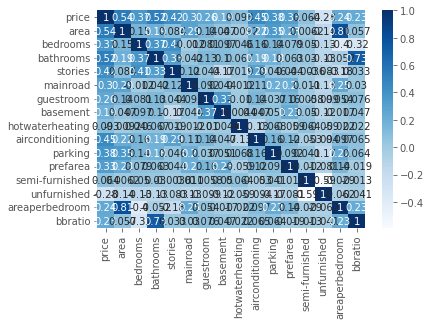

In [34]:
heatmap(cdf, annot=True, cmap = plt.cm.Blues)

In [35]:
pca = PCA()
x_lr = pca.fit_transform(x)

Text(0, 0.5, 'Cumulative Variance Ratio')

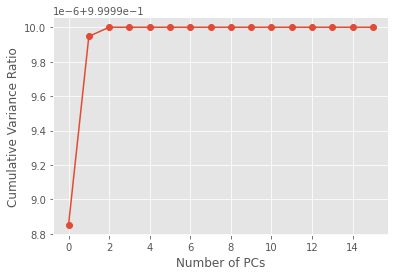

In [36]:
plt.plot(np.cumsum(pca.explained_variance_ratio_), '-o')
plt.xlabel('Number of PCs')
plt.ylabel('Cumulative Variance Ratio')

Text(0, 0.5, 'Ratio of Variance')

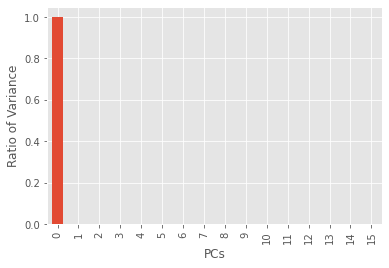

In [37]:
pd.Series(pca.explained_variance_ratio_).plot(kind='bar')
plt.xlabel('PCs')
plt.ylabel('Ratio of Variance')

In [38]:
np.cumsum(pca.explained_variance_ratio_)

array([0.99999885, 0.99999995, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        ])